In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.optimize import curve_fit
from scipy import misc
import matplotlib.pyplot as plt
from pylab import * 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
import requests
import math
import re
import csv

## 2HDM (type IV) limits from the low mass dark photon search

### Evaluation of sinTheta limits starting from the upper limit on the cross section * BR * acceptance

`Acceptance` evaluated generating gg $\to$ A events with Pythia (model: gg2A3 inclusive)

`Cross section` computed using HiGLU+HDECAY generators
`Branching ratios` (A $\to \mu\mu$) retrieved from here: ([link](https://github.com/cecilecaillol/CMS_HAA_SummaryPlots/blob/master/BR/BR_IV_0.5.dat))

In [2]:
# MODEL INDEPENDENT LIMITS on the cross section in pb for different mass points (GeV): 1,2,4,5,6,7,8. 
# Validation: mS = 20 GeV

#obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963 ]
obs_limit = [ 0.103242, 0.0958677, 0.120859, 0.0762025, 0.0827576, 0.0938192, 0.11963, 0.15 ]

v_obs_limit = []
v_exp_limit = []
v_mass = []
# Reference results: noPtMuMu cut
#f_obs_limit = np.loadtxt("./CMS_modelIndependentLimits_expectedLimit_noPtMuMuCut_20220401.txt", delimiter = "\t")

# Updated Trigger Efficiency: observed and expected results WITH PtMuMu cut
f_obs_limit = np.loadtxt("./limit_darkphoton_obs_CL90.txt")
f_exp_limit = np.loadtxt("./limit_darkphoton_exp_CL90.txt")

# Updated Trigger Efficiency: observed and expected results WITHOUT PtMuMu cut
#f_obs_limit = np.loadtxt("./CMS_modelIndependentLimits_obsLimit_newTreff_noPtCut_20220712.txt", delimiter = "\t")
#f_exp_limit = np.loadtxt("./CMS_modelIndependentLimits_expLimit_newTreff_noPtCut_20220712.txt", delimiter = "\t")

#print("shape of data:", f_br.shape)
#print("datatype of data:", f_br.dtype)
#print("First 5 rows:\n", f_br[:5])

for i in range(len(f_obs_limit)):
    v_mass.append(f_obs_limit[i][0])
    v_obs_limit.append(round(f_obs_limit[i][1], 9))
    v_exp_limit.append(round(f_exp_limit[i][1], 9))
print("Model independent observed limits: \n", v_obs_limit)
print("##################################################")
print("Model independent expected limits: \n", v_exp_limit)

Model independent observed limits: 
 [0.00274833, 0.001257463, 0.00107259, 0.001619974, 0.00153323, 0.001134848, 0.000875387, 0.000636026, 0.000701109, 0.00059541, 0.000240199, 0.000211777, 0.000187601, 0.00016606, 0.000201198, 0.000195946, 0.00012021, 0.000260149, 0.000390696, 0.000370346, 0.000239068, 0.000175039, 0.00013988, 0.000111144, 4.582e-05, 4.3693e-05, 5.3437e-05, 4.9229e-05, 7.0696e-05, 0.000108074, 0.00019989, 9.7608e-05, 5.3204e-05, 3.2147e-05, 2.8144e-05, 2.6701e-05, 2.2272e-05, 2.395e-05, 6.642e-05, 7.4059e-05, 4.6598e-05, 2.584e-05, 1.932e-05, 2.3446e-05, 3.2005e-05, 3.6335e-05, 5.4785e-05, 5.056e-05, 2.1666e-05, 1.1109e-05, 1.7288e-05, 2.5475e-05, 1.5001e-05, 1.2291e-05, 2.7926e-05, 2.2343e-05, 1.3135e-05, 8.187e-06, 5.445e-06, 7.615e-06, 1.3201e-05, 1.7023e-05, 1.8408e-05, 8.934e-06, 7.03e-06, 6.505e-06, 8.21e-06, 9.854e-06, 1.2169e-05, 6.593e-06, 5.865e-06, 6.904e-06, 8.813e-06, 1.0186e-05, 7.935e-06, 4.352e-06, 4.532e-06, 9.839e-06, 1.2606e-05, 1.1742e-05, 9999.0, 

In [3]:
print("mass: ", len(v_mass))
print("obs lim: ", len(v_obs_limit))
print("exp lim: ", len(v_exp_limit))

mass:  146
obs lim:  146
exp lim:  146


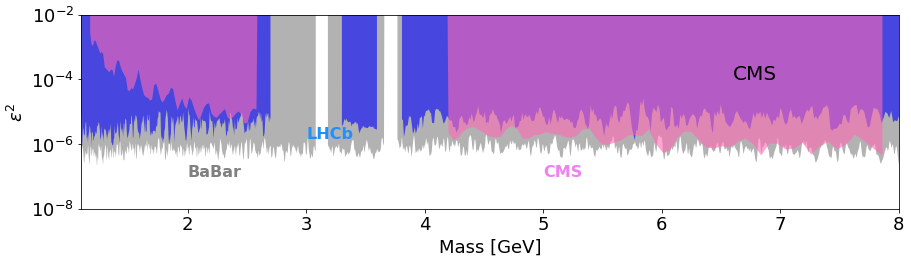

In [22]:
f_LHCb = np.loadtxt("./limit_darkphoton_lhcb_90CL.txt")
v_lim_LHCb = []
v_mass_LHCb = []
for i in range(len(f_LHCb)):
    v_mass_LHCb.append(f_LHCb[i][0]/1000) #Conversion from Mev to GeV
    v_lim_LHCb.append(f_LHCb[i][1])
    
f_BaBar = np.loadtxt("./limit_darkphoton_babar.txt")
v_lim_BaBar = []
v_mass_BaBar = []
for i in range(len(f_BaBar)):
    v_mass_BaBar.append(f_BaBar[i][0])
    v_lim_BaBar.append(f_BaBar[i][1]*f_BaBar[i][1])
#print("Model independent expected limits: \n", v_lim_BaBar)
    
p_cms_obs, p_lhcb = plt.subplots(figsize=(13, 4))
plt.rcParams.update({'font.size': 18})
#range = np.array([2.696,3.303])

p_babar = plt.plot(v_mass_BaBar, v_lim_BaBar, '-', color="grey", linewidth=0)
p_babar = plt.fill_between(v_mass_BaBar, v_lim_BaBar, 1, color="grey", linewidth=0, alpha=0.6)

p_lhcb = plt.plot(v_mass_LHCb, v_lim_LHCb, '-', color="blue", linewidth=0)
p_lhcb = plt.fill_between(v_mass_LHCb, v_lim_LHCb, 1, color="blue", linewidth=0, alpha=0.6)
p_lhcb = plt.semilogy()
p_cms_obs = plt.plot(v_mass, v_obs_limit, '-', color="hotpink", linewidth=0)
p_lhcb = plt.fill_between(v_mass, v_obs_limit, 1, color="hotpink", linewidth=0, alpha=0.6)

plt.xlim(1.1,8)
plt.ylim(1e-8, 1e-2)
plt.xlabel('Mass [GeV]')
plt.ylabel('$\\epsilon^2$')
#plt.title("Upper limits on the mixing angle for the 2HDM scenario")
#plt.legend(loc="upper left")
p_babar = plt.text(2.0, 1e-7, "BaBar", fontsize=16, color="grey", fontweight='bold')
p_cms_obs = plt.text(5.0, 1e-7, "CMS", fontsize=16, color="violet", fontweight='bold')
p_lhcb = plt.text(3, 1.5e-6, "LHCb", fontsize=16, color="dodgerblue", fontweight='bold')

plt.text(6.6, 1e-4, "CMS", fontsize=20, color="black")
#plt.text(5.6, 0.009, "2HDM+S (type IV), tan$\\beta$=0.5", fontsize=16, verticalalignment='top')
#plt.show()
plt.tight_layout()
plt.savefig('limit_darkphoton_OBS.pdf', dpi=1200)
plt.savefig('limit_darkphoton_OBS.png', dpi=1200)

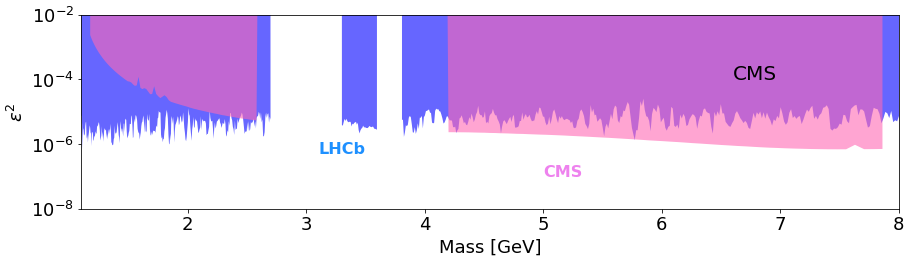

In [5]:

p_cms_obs, p_lhcb = plt.subplots(figsize=(13, 4))
plt.rcParams.update({'font.size': 18})
#range = np.array([2.696,3.303])

p_lhcb = plt.plot(v_mass_LHCb, v_lim_LHCb, '-', color="blue", linewidth=0)
p_lhcb = plt.fill_between(v_mass_LHCb, v_lim_LHCb, 1, color="blue", linewidth=0, alpha=0.6)
p_lhcb = plt.semilogy()
p_cms_exp = plt.plot(v_mass, v_exp_limit, '-', color="hotpink", linewidth=0)
p_lhcb = plt.fill_between(v_mass, v_exp_limit, 1, color="hotpink", linewidth=0, alpha=0.6)

plt.xlim(1.1,8)
plt.ylim(1e-8, 1e-2)
plt.xlabel('Mass [GeV]')
plt.ylabel('$\\epsilon^2$')
#plt.title("Upper limits on the mixing angle for the 2HDM scenario")
#plt.legend(loc="upper left")
p_cms_exp = plt.text(5.0, 1e-7, "CMS", fontsize=16, color="violet", fontweight='bold')
p_lhcb = plt.text(3.1, 5e-7, "LHCb", fontsize=16, color="dodgerblue", fontweight='bold')

plt.text(6.6, 1e-4, "CMS", fontsize=20, color="black")
#plt.text(5.6, 0.009, "2HDM+S (type IV), tan$\\beta$=0.5", fontsize=16, verticalalignment='top')
#plt.show()
plt.tight_layout()
plt.savefig('limit_darkphoton_EXP.pdf', dpi=1200)
plt.savefig('limit_darkphoton_EXP.png', dpi=1200)